# Ejemplo de modelo ARIMA y SARIMA

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [5]:
def best_arima(data, p_range, d_range, q_range):
    best_aic = float('inf')
    best_order = None
    best_model = None
    
    for p in p_range:
        for d in d_range:
            for q in q_range:
                try:
                    model = sm.tsa.ARIMA(data, order=(p, d, q)).fit()
                    if model.aic < best_aic:
                        best_aic = model.aic
                        best_order = (p, d, q)
                        best_model = model
                except:
                    continue
    return best_order, best_model

In [6]:
def best_sarima(data, p_range, d_range, q_range, seasonal_p_range, seasonal_d_range, seasonal_q_range):
    best_aic = float('inf')
    best_order = None
    best_model = None
    
    for p in p_range:
        for d in d_range:
            for q in q_range:
                for sp in seasonal_p_range:
                    for sd in seasonal_d_range:
                        for sq in seasonal_q_range:
                            try:
                                model = sm.tsa.SARIMAX(data, order=(p, d, q), seasonal_order=(sp, sd, sq, 12)).fit()
                                if model.aic < best_aic:
                                    best_aic = model.aic
                                    best_order = (p, d, q, sp, sd, sq)
                                    best_model = model
                            except:
                                continue
    return best_order, best_model

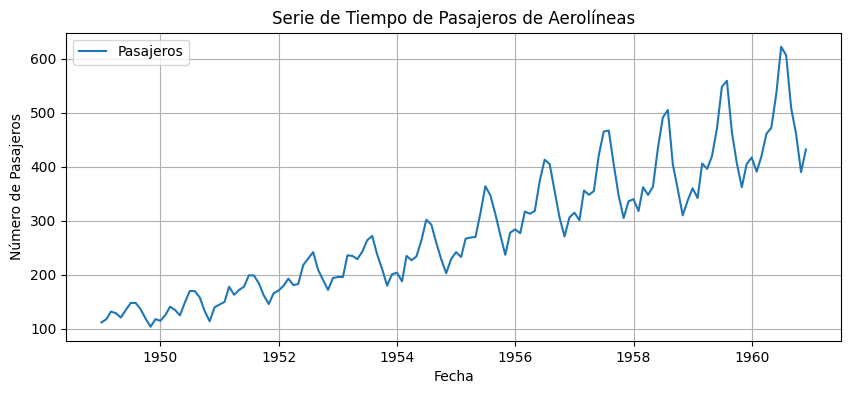

In [7]:

# Cargar datos de tiempo desde un URL
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
data = pd.read_csv(url)

# Renombramos la columna y convertimos la columna de fecha
data.columns = ['Month', 'Passengers']
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

# Visualizar la serie temporal
plt.figure(figsize=(10, 4))
plt.plot(data['Passengers'], label='Pasajeros')
plt.title('Serie de Tiempo de Pasajeros de Aerolíneas')
plt.xlabel('Fecha')
plt.ylabel('Número de Pasajeros')
plt.legend()
plt.grid()
plt.show()


In [8]:
# Encontrar los mejores parámetros ARIMA
p = range(0, 3)  # Orden AR
d = range(0, 2)  # Diferenciaciones
q = range(0, 3)  # Orden MA

best_order_arima, best_model_arima = best_arima(data['Passengers'], p, d, q)
print("Mejores parámetros ARIMA:", best_order_arima)

c:\Users\alonso.sandoval\AppData\Local\anaconda3\envs\clases\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\alonso.sandoval\AppData\Local\anaconda3\envs\clases\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\alonso.sandoval\AppData\Local\anaconda3\envs\clases\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\alonso.sandoval\AppData\Local\anaconda3\envs\clases\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\alonso.sandoval\AppData

Mejores parámetros ARIMA: (2, 1, 2)


c:\Users\alonso.sandoval\AppData\Local\anaconda3\envs\clases\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [9]:

# Encontrar los mejores parámetros SARIMA
seasonal_p = range(0, 3)  # Orden AR estacional
seasonal_d = range(0, 2)  # Diferenciaciones estacionales
seasonal_q = range(0, 3)  # Orden MA estacional

best_order_sarima, best_model_sarima = best_sarima(data['Passengers'], p, d, q, seasonal_p, seasonal_d, seasonal_q)
print("Mejores parámetros SARIMA:", best_order_sarima)


c:\Users\alonso.sandoval\AppData\Local\anaconda3\envs\clases\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\alonso.sandoval\AppData\Local\anaconda3\envs\clases\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\alonso.sandoval\AppData\Local\anaconda3\envs\clases\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\alonso.sandoval\AppData\Local\anaconda3\envs\clases\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\alonso.sandoval\AppData

Mejores parámetros SARIMA: (1, 1, 2, 1, 0, 0)


c:\Users\alonso.sandoval\AppData\Local\anaconda3\envs\clases\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
